In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
data = np.random.chisquare(1, 1000000000)
print(data)

[1.41660919e-01 1.25927448e+00 1.39021092e-02 ... 1.14565249e+00
 6.19647509e-01 4.53523336e-04]


In [3]:
def lap_noise(data, epsilon, N):
    pri_data = data + np.random.laplace(loc = 0.0, scale = (8*N/(N+2))/epsilon, size=data.shape)
    
    min = 10000
    
    for i in range(1000000000):
        if pri_data[i] > 0 and pri_data[i] < min:
            min = pri_data[i]
    
    for i in range(1000000000):
        if pri_data[i] < 0:
            pri_data[i] = min
    
    return pri_data

In [4]:
def precision(tp,fp):
    return tp/(tp+fp)

def recall(tp,fn):
    return tp/(tp+fn)

def f(tp,fp,fn):
    pre = precision(tp,fp)
    rec = recall(tp,fn)
    return 2*pre*rec/(pre+rec)

In [5]:
pri_data = lap_noise(data, 10, 100000)
print(pri_data)

[1.44335796e+00 1.40572090e+00 9.62583383e-09 ... 9.62583383e-09
 4.40702271e-01 9.62583383e-09]


In [6]:
sig = 0

si = 0
sigi = np.zeros(100000)

for i in range(1000000000):
    if data[i] >= 29.7:
        sig += 1
    if pri_data[i] >= 25:
        sigi[si] = i
        si += 1

print(sig)

53


In [7]:
tp = np.zeros(100)
fp = np.zeros(100)
fn = np.zeros(100)

th = np.zeros(100)

for i in range(100):
    th[i] = 25 + i*0.1


for i in range(si):
    for j in range(100):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] > 29.7:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(100):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8448275862068966 29.7


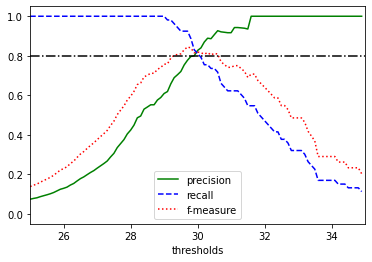

In [8]:
pre = np.zeros(100)
rec = np.zeros(100)
fme = np.zeros(100)

max = 0
maxi = 0

for i in range(100):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 25 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(25,35)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_chi^2_epsilon=10.png")
fig.savefig("fig/thresholds_chi^2_epsilon=10.eps")

In [9]:
pri_data = lap_noise(data, 7, 100000)
print(pri_data)

[2.12507566e-09 2.70430003e+00 6.29567727e-01 ... 1.03661132e+00
 5.45093572e-01 4.19133602e-01]


In [10]:
sig = 0

si = 0
sigi = np.zeros(100000)

for i in range(1000000000):
    if data[i] >= 29.7:
        sig += 1
    if pri_data[i] >= 25:
        sigi[si] = i
        si += 1

print(sig)

53


In [11]:
tp = np.zeros(100)
fp = np.zeros(100)
fn = np.zeros(100)

th = np.zeros(100)

for i in range(100):
    th[i] = 25 + i*0.1


for i in range(si):
    for j in range(100):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] > 29.7:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(100):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.7358490566037735 30.1


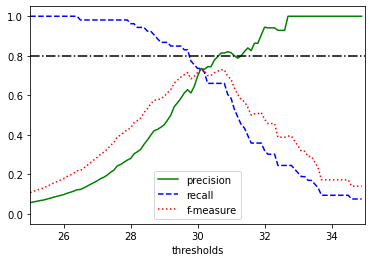

In [12]:
pre = np.zeros(100)
rec = np.zeros(100)
fme = np.zeros(100)

max = 0
maxi = 0

for i in range(100):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 25 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(25,35)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_chi^2_epsilon=7.png")
fig.savefig("fig/thresholds_chi^2_epsilon=7.eps")

In [13]:
pri_data = lap_noise(data, 5, 100000)
print(pri_data)

[3.12705637e-09 7.72425986e+00 3.12705637e-09 ... 3.12705637e-09
 3.12705637e-09 1.37208329e+00]


In [14]:
sig = 0

si = 0
sigi = np.zeros(100000)

for i in range(1000000000):
    if data[i] >= 29.7:
        sig += 1
    if pri_data[i] >= 25:
        sigi[si] = i
        si += 1

print(sig)

53


In [15]:
tp = np.zeros(100)
fp = np.zeros(100)
fn = np.zeros(100)

th = np.zeros(100)

for i in range(100):
    th[i] = 25 + i*0.1


for i in range(si):
    for j in range(100):
        if pri_data[int(sigi[i])] > th[j]:
            if data[int(sigi[i])] > 29.7:
                tp[j] += 1
            else:
                fp[j] += 1
        else:
            break

for j in range(100):
    fn[j] = sig - tp[j]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5547445255474452 30.7


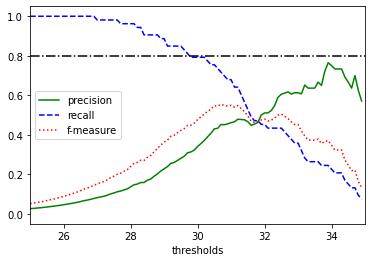

In [16]:
pre = np.zeros(100)
rec = np.zeros(100)
fme = np.zeros(100)

max = 0
maxi = 0

for i in range(100):
    pre[i] = precision(tp[i], fp[i])
    rec[i] = recall(tp[i], fn[i])
    fme[i] = f(tp[i],fp[i],fn[i])
    if fme[i] > max:
        max = fme[i]
        maxi = i

print(max, 25 + maxi*0.1)

fig = plt.figure()
plt.ylim(-0.05,1.05)
plt.xlim(25,35)
plt.plot(th, pre, marker="", color = "green", linestyle = "-", label = "precision")
plt.plot(th, rec, marker="", color = "blue", linestyle = "--", label = "recall")
plt.plot(th, fme, marker="", color = "red", linestyle = "dotted", label = "f-measure")
plt.axhline(0.8, color = "black", linestyle = "-.")
plt.legend()
plt.xlabel("thresholds")
plt.ylabel("")
fig.savefig("thresholds_chi^2_epsilon=5.png")
fig.savefig("fig/thresholds_chi^2_epsilon=5.eps")